In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
world_happiness = pd.read_csv('../data/world_happiness_2017.csv')
world_happiness.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
pet_populations = pd.read_csv('../data/pet-populations.csv')
pet_populations.head()

,Pet,Country,Population
0,Dog,USA,69929000
1,Dog,China,27400000
2,Dog,Russia,12520000
3,Dog,Japan,12000000
4,Dog,Philippines,11600000


In [4]:
world_population = pd.read_csv('../data/world_population.csv')
#world_population['Population'] = world_population['Population']*1000000
world_population.head()

,Country,Human Population
0,Bermuda,0.06827
1,Canada,33.75974
2,Greenland,0.05764
3,Mexico,112.46886
4,Saint Pierre and Miquelon,0.00594


In [5]:
world_gdp = pd.read_csv('../data/country-GDP-2017.csv',encoding = "ISO-8859-1")
world_gdp.head()

,Country Name,Country Code,2017
0,Aruba,ABW,2.081530e+10
1,Afghanistan,AFG,1.240000e+11
2,Angola,AGO,1.303935e+10
3,Albania,ALB,3.012914e+09
4,Andorra,AND,2.590000e+12


In [6]:
world_gdp = pd.read_csv('../data/country-GDP-2017.csv',encoding = "ISO-8859-1", names = ['Country Name', 'Country Code', 'GDP'], skiprows = 1)
world_gdp.head(1)

,Country Name,Country Code,GDP
0,Aruba,ABW,2.081530e+10


In [7]:
#world_population = pd.merge(world_population, world_gdp, on = ['Country', 'Country Name'])

In [8]:
pet_df = pd.merge(pet_populations, world_population, on = ['Country', 'Country'])
pet_df.head()

,Pet,Country,Population,Human Population
0,Dog,China,27400000,1330.14129
1,Cat,China,53100000,1330.14129
2,Dog,Russia,12520000,139.39021
3,Cat,Russia,17800000,139.39021
4,Bird,Russia,2800000,139.39021


In [16]:
world_gdp = pd.read_csv('../data/country-GDP-2017.csv',encoding = "ISO-8859-1", names = ['Country', 'Country Code', 'GDP'], skiprows = 1)
world_happiness = pd.read_csv('../data/world_happiness_2017.csv')
merged_df = pd.merge(world_gdp, world_happiness, on = ['Country', 'Country'])
merged_df.head()

,Country,Country Code,GDP,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Afghanistan,AFG,1.240000e+11,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Angola,AGO,1.303935e+10,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
2,Albania,ALB,3.012914e+09,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
3,United Arab Emirates,ARE,6.380000e+11,21,6.648,6.722047,6.573952,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704
4,Argentina,ARG,1.153659e+10,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


In [9]:
pet_df['PPC'] = pet_df['Population']/(1000000*pet_df['Human Population'])
pet_df.sort_values(by=['PPC'], ascending=False)
pet_df.head()

,Pet,Country,Population,Human Population,PPC
0,Dog,China,27400000,1330.14129,0.020599
1,Cat,China,53100000,1330.14129,0.039921
2,Dog,Russia,12520000,139.39021,0.089820
3,Cat,Russia,17800000,139.39021,0.127699
4,Bird,Russia,2800000,139.39021,0.020087


In [10]:
pet_happiness = pd.merge(pet_df, world_happiness[['Country', 'Happiness.Score']], on = ['Country', 'Country'], how='inner')
pet_happiness = pd.merge(pet_happiness)
pd.merge(world_gdp, world_happiness, on = ['Country', 'Country'])
pet_happiness.head()

,Pet,Country,Population,Human Population,PPC,Happiness.Score
0,Dog,China,27400000,1330.14129,0.020599,5.273
1,Cat,China,53100000,1330.14129,0.039921,5.273
2,Dog,Russia,12520000,139.39021,0.089820,5.963
3,Cat,Russia,17800000,139.39021,0.127699,5.963
4,Bird,Russia,2800000,139.39021,0.020087,5.963


In [11]:
pet_happiness.to_csv('../data/pet_happiness.csv')

In [12]:
dog_df = pet_happiness.query('Pet == "Dog"')
dog_df.to_csv('../data/dog_data.csv')

In [13]:
dog_df

,Pet,Country,Population,Human Population,PPC,Happiness.Score
0,Dog,China,27400000,1330.14129,0.020599,5.273
2,Dog,Russia,12520000,139.39021,0.089820,5.963
6,Dog,Japan,12000000,126.80443,0.094634,5.920
8,Dog,Philippines,11600000,99.90018,0.116116,5.430
9,Dog,India,10200000,1173.10802,0.008695,4.315
10,Dog,Argentina,9200000,41.34320,0.222528,6.599
12,Dog,France,7570000,63.33964,0.119514,6.442
16,Dog,South Africa,7400000,49.10911,0.150685,4.829
18,Dog,Poland,7311000,38.46369,0.190075,5.973
22,Dog,Italy,7000000,58.12216,0.120436,5.964


In [14]:
x = dog_df['PPC']
y = dog_df['Happiness.Score']
s = dog_df['Country']

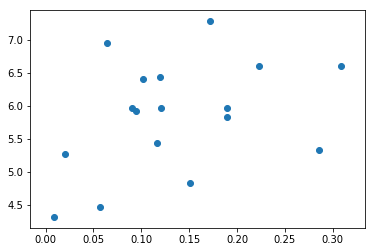

In [15]:
plt.scatter(x, y)
plt.show()